<a href="https://colab.research.google.com/github/yx1226/GP-in-data-mining-for-ChemBL/blob/main/ChemBL_LinearGP_10_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and tool installation

In [1]:
# GP Library
!pip install deap 
!pip install gplearn 

# RDKit
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

!pip install rdkit
!pip install mordred
!pip install catboost

--2021-04-05 04:42:00--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2021-04-05 04:42:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / failed with initial 

# Data Preprocessing and Transformation



>Import all the dataset from the Google Drive

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authos# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authoization.
drive.mount('/content/drive', force_remount=True)

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/ChemBL"

Mounted at /content/drive
 5ht1A.csv     at1.csv		 fxa.csv	        hivp.csv      pkc.csv
 5ht3.csv      cox.csv		 fxa.gsheet	        hivp.gsheet   renin.csv
 ache.csv      d2.csv		 gplearn_functions.py   mmp1.csv      subp.csv
 ache.gsheet  'fxa (1).gsheet'	 gplearn_genetic.py     pde4.csv      thrm.csv


In [3]:
import pandas as pd
import numpy as np
from glob import glob

filenames = glob('/content/drive/My Drive/ChemBL/*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

In [4]:
files = []

# Get the filenames
for filename in filenames:
  files.append(filename)

print(files)

['/content/drive/My Drive/ChemBL/at1.csv', '/content/drive/My Drive/ChemBL/mmp1.csv', '/content/drive/My Drive/ChemBL/pkc.csv', '/content/drive/My Drive/ChemBL/pde4.csv', '/content/drive/My Drive/ChemBL/5ht3.csv', '/content/drive/My Drive/ChemBL/cox.csv', '/content/drive/My Drive/ChemBL/ache.csv', '/content/drive/My Drive/ChemBL/d2.csv', '/content/drive/My Drive/ChemBL/renin.csv', '/content/drive/My Drive/ChemBL/subp.csv', '/content/drive/My Drive/ChemBL/thrm.csv', '/content/drive/My Drive/ChemBL/5ht1A.csv', '/content/drive/My Drive/ChemBL/hivp.csv', '/content/drive/My Drive/ChemBL/fxa.csv']


In [5]:
i = 0

for dataframe in dataframes:
  print(files[i])
  i = i +1

  print(dataframe)

/content/drive/My Drive/ChemBL/at1.csv
     Column1  ... CLASS_LABEL
0       2725  ...           1
1       9926  ...           1
2      32747  ...           1
3      38798  ...           1
4      38799  ...           1
..       ...  ...         ...
101    16308  ...           0
102    16591  ...           0
103    18694  ...           0
104    18695  ...           0
105    18834  ...           0

[106 rows x 169 columns]
/content/drive/My Drive/ChemBL/mmp1.csv
     Column1  ... CLASS_LABEL
0       1483  ...           1
1       1484  ...           1
2       1514  ...           1
3       1515  ...           1
4       1548  ...           1
..       ...  ...         ...
390  1559786  ...           0
391  1559787  ...           0
392  1559788  ...           0
393  1559799  ...           0
394  1559805  ...           0

[395 rows x 169 columns]
/content/drive/My Drive/ChemBL/pkc.csv
     Column1  ... CLASS_LABEL
0        213  ...           1
1       1054  ...           1
2      75229  ...   

> From the data observation, we can see that all the datasets have **169 cols**. So I did the data preprocessing by using standard scaler to check any missing value inside the dataset.



In [6]:
# MDLPublicKeys are the fingerprints of datasets

index = [#'Column1', 'Column9',	
         'MDLPublicKeys[1]', 'MDLPublicKeys[2]', 'MDLPublicKeys[3]', 'MDLPublicKeys[4]',
         'MDLPublicKeys[5]', 'MDLPublicKeys[6]', 'MDLPublicKeys[7]', 'MDLPublicKeys[8]',
         'MDLPublicKeys[9]', 'MDLPublicKeys[10]', 'MDLPublicKeys[11]', 'MDLPublicKeys[12]',
         'MDLPublicKeys[13]', 'MDLPublicKeys[14]', 'MDLPublicKeys[15]', 'MDLPublicKeys[16]',
         'MDLPublicKeys[17]', 'MDLPublicKeys[18]',' MDLPublicKeys[19]', 'MDLPublicKeys[20]',
         'MDLPublicKeys[21]', 'MDLPublicKeys[22]', 'MDLPublicKeys[23]', 'MDLPublicKeys[24]',
         'MDLPublicKeys[25]', 'MDLPublicKeys[26]', 'MDLPublicKeys[27]', 'MDLPublicKeys[28]',
         'MDLPublicKeys[29]', 'MDLPublicKeys[30]', 'MDLPublicKeys[31]', 'MDLPublicKeys[32]',
         'MDLPublicKeys[33]', 'MDLPublicKeys[34]', 'MDLPublicKeys[35]',	'MDLPublicKeys[36]',
         'MDLPublicKeys[37]',	'MDLPublicKeys[38]',	'MDLPublicKeys[39]', 'MDLPublicKeys[40]',
         'MDLPublicKeys[41]',	'MDLPublicKeys[42]',	'MDLPublicKeys[43]', 'MDLPublicKeys[44]',
         'MDLPublicKeys[45]',	'MDLPublicKeys[46]',	'MDLPublicKeys[47]', 'MDLPublicKeys[48]',
         'MDLPublicKeys[49]',	'MDLPublicKeys[50]', 'MDLPublicKeys[51]',	'MDLPublicKeys[52]', 'MDLPublicKeys[53]',
         'MDLPublicKeys[54]',	'MDLPublicKeys[55]', 'MDLPublicKeys[56]',	'MDLPublicKeys[57]',	'MDLPublicKeys[58]',
         'MDLPublicKeys[59]', 'MDLPublicKeys[60]', 'MDLPublicKeys[61]', 'MDLPublicKeys[62]',
         'MDLPublicKeys[63]',	'MDLPublicKeys[64]', 'MDLPublicKeys[65]',	'MDLPublicKeys[66]',	
         'MDLPublicKeys[67]', 'MDLPublicKeys[68]', 'MDLPublicKeys[69]', 'MDLPublicKeys[70]',
         'MDLPublicKeys[71]', 'MDLPublicKeys[72]', 'MDLPublicKeys[73]', 'MDLPublicKeys[74]', 'MDLPublicKeys[75]', 'MDLPublicKeys[76]',
         'MDLPublicKeys[77]', 'MDLPublicKeys[78]', 'MDLPublicKeys[79]','MDLPublicKeys[80]',	
         'MDLPublicKeys[81]', 'MDLPublicKeys[82]', 'MDLPublicKeys[83]','MDLPublicKeys[84]',	
         'MDLPublicKeys[85]', 'MDLPublicKeys[86]', 'MDLPublicKeys[87]','MDLPublicKeys[88]',
         'MDLPublicKeys[89]', 'MDLPublicKeys[90]', 'MDLPublicKeys[91]','MDLPublicKeys[92]',
         'MDLPublicKeys[93]', 'MDLPublicKeys[94]', 'MDLPublicKeys[95]','MDLPublicKeys[96]',
         'MDLPublicKeys[97]', 'MDLPublicKeys[98]', 'MDLPublicKeys[99]','MDLPublicKeys[100]',
         'MDLPublicKeys[101]', 'MDLPublicKeys[102]', 'MDLPublicKeys[103]','MDLPublicKeys[104]',
         'MDLPublicKeys[105]', 'MDLPublicKeys[106]', 'MDLPublicKeys[107]','MDLPublicKeys[108]',
         'MDLPublicKeys[109]', 'MDLPublicKeys[110]', 'MDLPublicKeys[111]','MDLPublicKeys[112]',
         'MDLPublicKeys[113]', 'MDLPublicKeys[114]', 'MDLPublicKeys[115]','MDLPublicKeys[116]',
         'MDLPublicKeys[117]', 'MDLPublicKeys[118]', 'MDLPublicKeys[119]', 'MDLPublicKeys[120]',
         'MDLPublicKeys[121]', 'MDLPublicKeys[122]', 'MDLPublicKeys[123]', 'MDLPublicKeys[124]',
         'MDLPublicKeys[125]', 'MDLPublicKeys[126]', 'MDLPublicKeys[127]', 'MDLPublicKeys[128]',
         'MDLPublicKeys[129]', 'MDLPublicKeys[130]', 'MDLPublicKeys[131]', 'MDLPublicKeys[132]',
         'MDLPublicKeys[133]', 'MDLPublicKeys[134]', 'MDLPublicKeys[135]', 'MDLPublicKeys[136]',
         'MDLPublicKeys[137]', 'MDLPublicKeys[138]', 'MDLPublicKeys[139]', 'MDLPublicKeys[140]',
         'MDLPublicKeys[141]', 'MDLPublicKeys[142]', 'MDLPublicKeys[143]', 'MDLPublicKeys[144]',
         'MDLPublicKeys[145]', 'MDLPublicKeys[146]', 'MDLPublicKeys[147]', 'MDLPublicKeys[148]',
         'MDLPublicKeys[149]', 'MDLPublicKeys[150]', 'MDLPublicKeys[151]', 'MDLPublicKeys[152]', 
         'MDLPublicKeys[153]', 'MDLPublicKeys[154]', 'MDLPublicKeys[155]', 'MDLPublicKeys[156]', 
         'MDLPublicKeys[157]', 'MDLPublicKeys[158]', 'MDLPublicKeys[159]', 'MDLPublicKeys[160]', 
         'MDLPublicKeys[161]','MDLPublicKeys[162]', 'MDLPublicKeys[163]', 'MDLPublicKeys[164]',
         'MDLPublicKeys[165]', 'MDLPublicKeys[166]'
         #'CLASS_LABEL'
         ]

In [7]:
import array, random, operator, math
from sklearn.preprocessing import StandardScaler

i = 0
data_distribution = []

for dataframe in dataframes:
  array = dataframe.to_numpy()
  X = array[:,2:168]
  y = array[:,-1]
  data = StandardScaler().fit_transform(X)
  data_distribution = [(files[i],data)]
  print(files[i])
  print(data, "\n")
  i = i +1

/content/drive/My Drive/ChemBL/at1.csv
[[-0.34027852  0.          0.         ...  0.         -2.01186954
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 ...
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]] 

/content/drive/My Drive/ChemBL/mmp1.csv
[[-0.07133764  0.          0.         ...  0.34493502  0.
   0.21850711]
 [-0.07133764  0.          0.         ...  0.34493502  0.
   0.21850711]
 [-0.07133764  0.          0.         ...  0.34493502  0.
   0.21850711]
 ...
 [-0.07133764  0.          0.         ...  0.34493502  0.
   0.21850711]
 [-0.07133764  0.          0.         ...  0.34493502  0.
   0.21850711]
 [14.01784577  0.          0.         ...  0.34493502  0.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

tableau_20 = [(31,119,180), (174,199,232), (255,127,14),
              (255,187,120), (44,160,44), (152,223,138),
              (214,39,40), (255,152,150), (148,103,189)]

for i in range(len(tableau_20)):
  r, g, b = tableau_20[i]
  tableau_20[i] = (r/255., g/255., b/255.)

def make_plot(item):
  temp = index[:]
  file_, X = data_distribution[item]
  dfTemp = pd.DataFrame(X, columns=temp)

  print(file_, ":")

  sns.set_style("whitegrid")

  #Check The correlation wherethe is +VE or -VE
  g = sns.jointplot(x = "MDLPublicKeys[54]", y = "MDLPublicKeys[166]",
                    data = dfTemp, kind = "reg", color = tableau_20[6])
  #corr = dfTemp.corr()
  #sns.heatmap(corr)
  
  plt.show()
  print()

/content/drive/My Drive/ChemBL/fxa.csv :


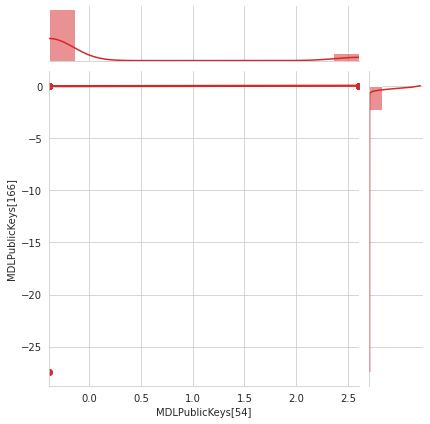


/content/drive/My Drive/ChemBL/fxa.csv :


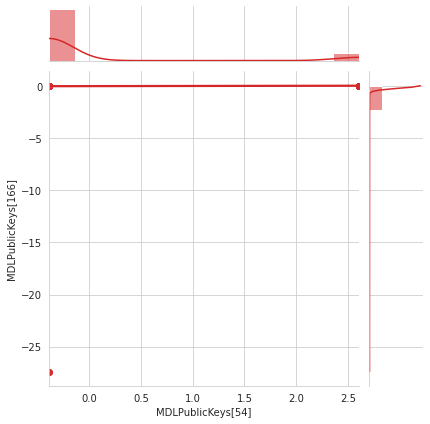


/content/drive/My Drive/ChemBL/fxa.csv :


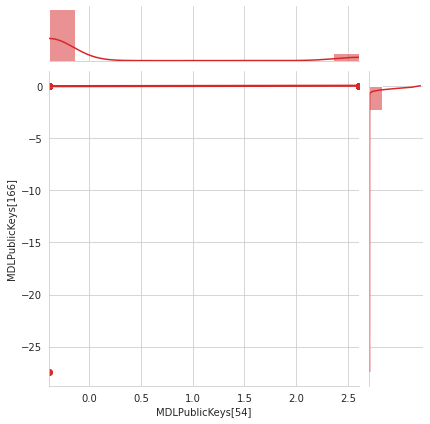


/content/drive/My Drive/ChemBL/fxa.csv :


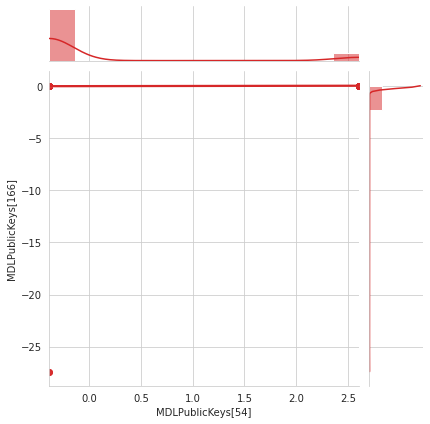


/content/drive/My Drive/ChemBL/fxa.csv :


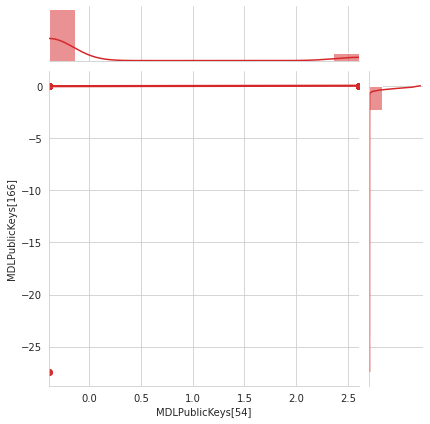


/content/drive/My Drive/ChemBL/fxa.csv :


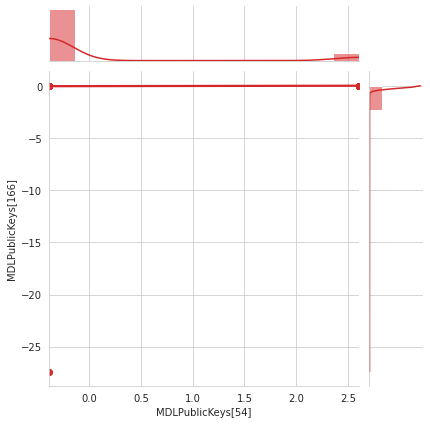


/content/drive/My Drive/ChemBL/fxa.csv :


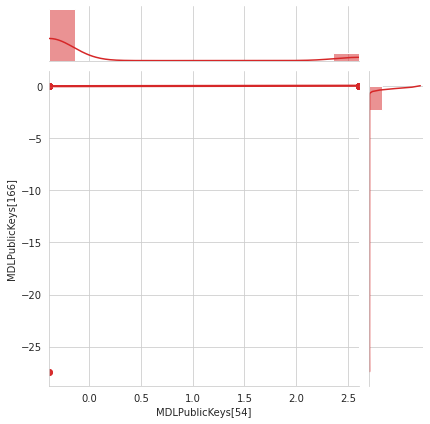


/content/drive/My Drive/ChemBL/fxa.csv :


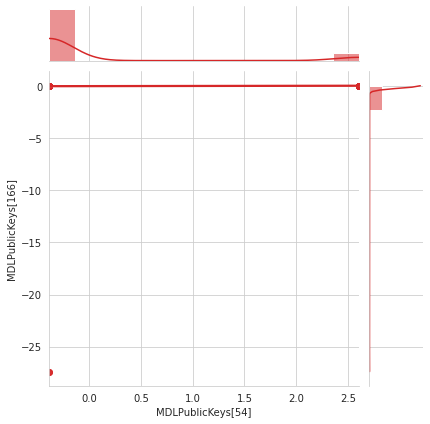


/content/drive/My Drive/ChemBL/fxa.csv :


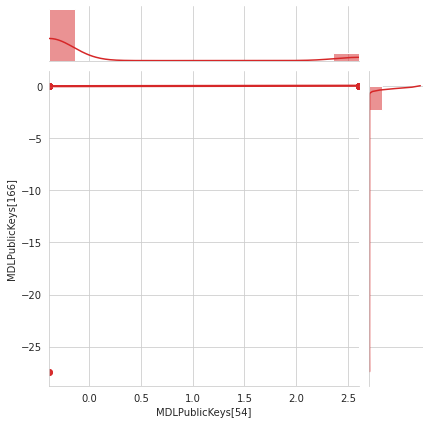


/content/drive/My Drive/ChemBL/fxa.csv :


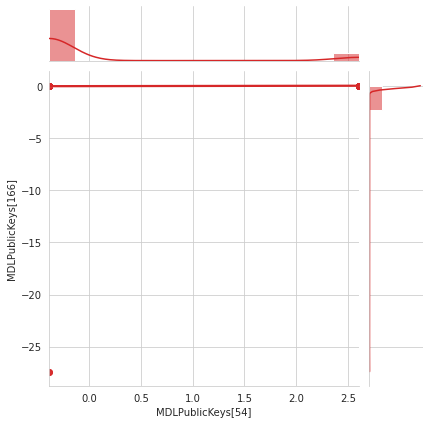


/content/drive/My Drive/ChemBL/fxa.csv :


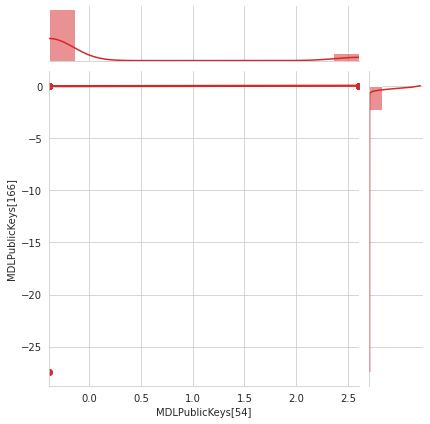


/content/drive/My Drive/ChemBL/fxa.csv :


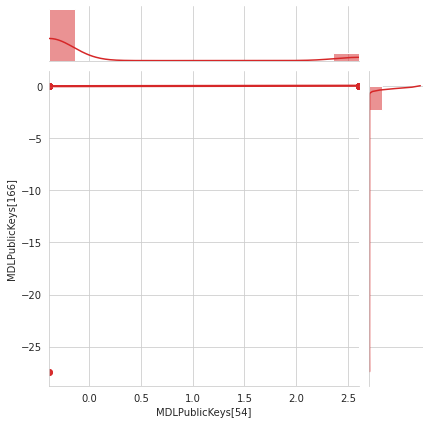


/content/drive/My Drive/ChemBL/fxa.csv :


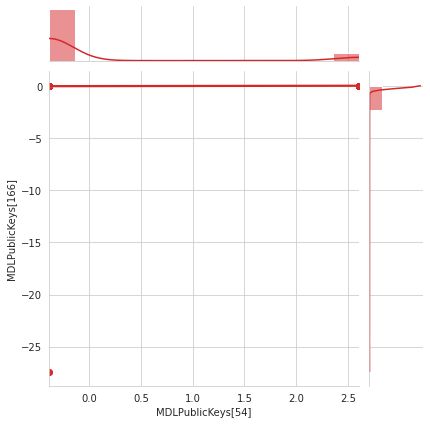


/content/drive/My Drive/ChemBL/fxa.csv :


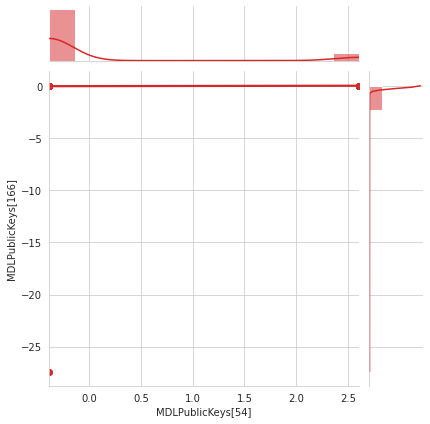

In [9]:
# for distribution in range(len(data_distribution)):
  # make_plot(distribution)

for dataframe in dataframes:
  array = dataframe.to_numpy()
  X = array[:,2:168]
  y = array[:,-1]
  data = StandardScaler().fit_transform(X)
  for distribution in range(len(data_distribution)):
    make_plot(distribution)

After the data preprocessing, we can know that all of them do not has any missing value.

# Genetic Programming

In [10]:
import random
import operator
import math

%pylab inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from linear_genetic_programming.lgp_classifier import LGPClassifier

from sympy import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['array', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [42]:
import operator
## CREATE EQUATION 
"""
Terminal 
N: total number of compounds, 
NACT: number of active compounds, 
NINACT: number of inactive compounds, 
TOT: total number of compounds containing fragment I (O, N, C, H, Br, I, Cl, F, S, or P)
ACT: number of active compounds containing fragment I, 
INACT: number of inactive compounds containing fragment I
"""

val1 = {"terminal": "NINACT"}
val2 = {"terminal": "N"}
val3 = {"terminal": "NACT"}
val4 = {"terminal": "INACT"}
val5 = {"terminal": "TOT"}
val6 = {"terminal": "ACT"}

node1 = {
    "func": operator.sub,
    "children": [val2, val3],
    "format_str": "({} / {})",
}

node2 ={
    "func": operator.sub,
    "children": [node1, val4],
    "format_str": "({} - {})",   
}

node3 = {
    "func": operator.sub,
    "children": [node2, val5],
    "format_str": "({} + {})",
}

node4 = {
    "func": operator.sub,
    "children": [node3, val6],
    "format_str": "({} / {})",
}

program = {
    "func": operator.mul,
    "children": [node4, val1],
    "format_str": "({} * {})",
}

def render_prog(node):
    if "children" not in node:
        return node["terminal"]
    return node["format_str"].format(*[render_prog(c) for c in node["children"]])

print(render_prog(program))

(((((N / NACT) - INACT) + TOT) / ACT) * NINACT)


In [57]:
x = 0
df_list_X_train=[]
df_list_X_test = []
df_list_y_train = []
df_list_y_test = []

for i in dataframes:
  Name = files[x]
  Name = Name[31:-4].upper()
  df = i.iloc[:, 2:168]
  y = i['CLASS_LABEL']
  X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1)
  # print(x_test)
  for column in index[0:18]:
    #columnSeriesObj = df[column]
    label = column
    
    # total number of compounds
    N_X_train = X_train[column].count()
    N_X_test = X_test[column].count() 
  
    # number of active compounds
    NACT_X_train = X_train[column].sum()
    NACT_X_test = X_test[column].sum()
    
    # number of inactive compounds
    NINACT_X_train = N_X_train - NACT_X_train
    NINACT_X_test = N_X_test - NACT_X_test
  
    # total number of compounds containing fragment I
    TOT_X_train = N_X_train *0.7
    TOT_X_test = N_X_train *0.7

    #number of active compounds containing fragment I
    ACT_X_train = NACT_X_train * 0.7
    ACT_X_test = NACT_X_test * 0.7
    
    # number of inactive compounds containing fragment I
    INACT_X_train = NINACT_X_train * 0.3
    INACT_X_test = NINACT_X_test * 0.3
    
    df_dict_X_train = {'Name': Name, 'N': N_X_train, 'NACT': NACT_X_train, 'NINACT': NINACT_X_train, 'TOT': TOT_X_train, 'ACT': ACT_X_train, 'INACT': INACT_X_train}
    df_dict_X_test = {'Name': Name, 'N': N_X_test, 'NACT': NACT_X_test, 'NINACT': NINACT_X_test, 'TOT': TOT_X_test, 'ACT': ACT_X_test, 'INACT': INACT_X_test}
  df_list_X_train.append(df_dict_X_train)
  df_list_X_test.append(df_dict_X_test)

  #for column in y_train:
  N_y_train = y_train.count()
  N_y_test = y_test.count()

  NACT_y_train = y_train.sum()
  NACT_y_test = y_test.sum()

  NINACT_y_train = N_y_train - NACT_y_train
  NINACT_y_test = N_X_test - NACT_X_test 

  TOT_y_train = N_y_train *.7
  TOT_y_test = N_y_test *.7

  ACT_y_train = NACT_y_train * 0.7
  ACT_y_test = NACT_y_test *0.7

  INACT_y_train = NINACT_y_train * 0.3
  INACT_y_test = NINACT_y_test * 0.3

  df_dict_y_train = {'Name': Name, 'N': N_y_train, 'NACT': NACT_y_train, 'NINACT': NINACT_y_train, 'TOT': TOT_y_train, 'ACT': ACT_y_train, 'INACT': INACT_y_train}
  df_dict_y_test = {'Name': Name, 'N': N_y_test, 'NACT': NACT_y_test, 'NINACT': NINACT_y_test, 'TOT': TOT_y_test, 'ACT': ACT_y_test, 'INACT': INACT_y_test}
  df_list_y_train.append(df_dict_y_train)
  df_list_y_test.append(df_dict_y_test)
  x +=1

# Save the X train and X test into CSV file
df_X_train = pd.DataFrame(df_list_X_train)
df_X_train.to_csv("X_train_10_90.csv")

df_X_test = pd.DataFrame(df_list_X_test)
df_X_test.to_csv("X_test_10_90.csv")

# Save the y train and y test into CSV file
df_y_train = pd.DataFrame(df_list_y_train)
df_y_train.to_csv("y_train_10_90.csv")

df_y_test = pd.DataFrame(df_list_y_test)
df_y_test.to_csv("y_test_10_90.csv")

In [58]:
prediction_test = df_X_test.iloc[:,1:7]
prediction_train = df_X_train.iloc[:, 1:7]

y_test_target = df_y_test.iloc[:,1:7]
y_train_target = df_y_train.iloc[:,1:7]

In [43]:
def safe_div(a, b):
    return a / b if b else a

def safe_sqrt(a):
  return pow(a, 2)

import math
def log(a):
  a = abs(a)
  return math.log1p(a)

def neg(a):
  return -(a)

operations = (
    {"func": operator.add, "arg_count": 2, "format_str": "({} + {})"},
    {"func": operator.sub, "arg_count": 2, "format_str": "({} - {})"},
    {"func": operator.mul, "arg_count": 2, "format_str": "({} * {})"},
    {"func": safe_div, "arg_count": 2, "format_str": "({} / {})"},
    {"func": safe_sqrt, "arg_count": 1, "format_str": "(√{})"},
    {"func": log, "arg_count": 1, "format_str": "log({})"}
)

from random import randint, random, seed

seed(0)

def random_prog(depth):
    # favor adding function nodes near the tree root and
    # leaf nodes as depth increases
    if randint(0, 10) >= depth * 2:
        op = operations[randint(0, len(operations) - 1)]
        return {
            "func": op["func"],
            "children": [random_prog(depth + 1) for _ in range(op["arg_count"])],
            "format_str": op["format_str"],
        }
    else:
        return {"terminal": prediction_train.columns[randint(0, prediction_train.shape[1] - 1)]}

In [25]:
POP_SIZE = 120  # population size = 80, 90, 100
population = [random_prog(0) for _ in range(POP_SIZE)]

print(render_prog(population[0]))

def select_random_node(selected, parent, depth):
    if "children" not in selected:
        return parent
    # favor nodes near the root
    if randint(0, 10) < 2*depth:
        return selected
    child_count = len(selected["children"])
    return select_random_node(
        selected["children"][randint(0, child_count - 1)],
        selected, depth+1)

print(render_prog(select_random_node(program, None, 0)))

from copy import deepcopy

def do_mutate(selected):
    offspring = deepcopy(selected)
    mutate_point = select_random_node(offspring, None, 0)
    child_count = len(mutate_point["children"])
    mutate_point["children"][randint(0, child_count - 1)] = random_prog(0)
    return offspring


print(render_prog(do_mutate(program)))

def do_xover(selected1, selected2):
    offspring = deepcopy(selected1)
    xover_point1 = select_random_node(offspring, None, 0)
    xover_point2 = select_random_node(selected2, None, 0)
    child_count = len(xover_point1["children"])
    xover_point1["children"][randint(0, child_count - 1)] = xover_point2
    return offspring

print(render_prog(do_xover(population[1], population[79])))

(NINACT / ((((NACT - NACT) * ACT) * ACT) / (N - INACT)))
((((N / NACT) - INACT) + TOT) / ACT)
((((TOT - (√(√INACT))) + TOT) / ACT) * NINACT)
(((ACT / ((ACT / N) - (INACT + INACT))) + log(((ACT / log((NINACT - NACT))) / ((log(N) * ACT) - NINACT)))) / (INACT * log(NACT)))


In [26]:
TOURNAMENT_SIZE = 2 # tournament size = 1,2,3,4

def get_random_parent(population, fitness):
    # randomly select population members for the tournament
    tournament_members = [
        randint(0, POP_SIZE - 1) for _ in range(TOURNAMENT_SIZE)]
    # select tournament member with best fitness
    member_fitness = [(fitness[i], population[i]) for i in tournament_members]
    return min(member_fitness, key=lambda x: x[0])[1]

In [27]:
XOVER_PCT = 0.6

def get_offspring(population, fitness):
    parent1 = get_random_parent(population, fitness)
    if random() > XOVER_PCT:
        parent2 = get_random_parent(population, fitness)
        return do_xover(parent1, parent2)
    else:
        return do_mutate(parent1)

In [28]:
REG_STRENGTH = 0.5 # region strength = 0.5

def node_count(x):
    if "children" not in x:
        return 1
    return sum([node_count(c) for c in x["children"]])


def compute_fitness(program, prediction, target):
    mse = ((pd.Series(prediction)- pd.Series(target)) ** 0.2).mean()
    penalty = node_count(program) ** REG_STRENGTH
    return mse * penalty

In [33]:
render_prog(program)

'(((((N / NACT) - INACT) + TOT) / ACT) * NINACT)'

In [46]:
def evaluate(node, row):
    if "children" not in node:
        return row[node["terminal"]]
    return node["func"](*[evaluate(c, row) for c in node["children"]])

In [48]:
"""
     X_test and X_train
"""
MAX_GENERATIONS = 30
global_best = float("inf")
best_prog = ""
for gen in range(MAX_GENERATIONS):
    fitness = []
    for prog in population:
        prediction = [evaluate(prog, row) for _, row in prediction_train.iterrows()]
        target = [
           evaluate(prog, row) for _, row in prediction_test.iterrows()]
        score = compute_fitness(prog, prediction, target)
        # print(score)
        fitness.append(score)
        if score > global_best:
            global_best = score
            best_pred = prediction
            best_prog = prog
            print(best_prog)
  
    print(
        "Generation: %d\nBest Score: %.2f\n\nBest program: %s\n"
        % (
            gen,
            global_best,
            render_prog(prog),
        )
    )
    population = [
        get_offspring(population, fitness)
        for _ in range(POP_SIZE)]

Generation: 0
Best Score: inf

Best program: ((((((((√(ACT / ((ACT * (log(NACT) * NINACT)) - (TOT - (INACT * (√ACT)))))) - ((((√ACT) / (NINACT * (√N))) / (log(NINACT) - NACT)) * (√N))) * ((√(INACT / ((NINACT + ACT) / (N / INACT)))) / (√((√TOT) + ((√(ACT * N)) / (INACT - (N + NINACT))))))) / ((√log(NACT)) + (((TOT / (NACT - NINACT)) / (ACT / INACT)) * ACT))) * (√N)) + (log(ACT) * ((INACT * (NINACT / ACT)) - (TOT - ACT)))) * (log(((NACT / log((TOT * (INACT / log(NINACT))))) / log(NACT))) * (√(√NACT)))) / (√(((√(√NACT)) - (√(√(((TOT * TOT) - N) / ACT)))) / log((log(TOT) - ((log((TOT + TOT)) - (NACT + (√INACT))) - (√N)))))))

Generation: 1
Best Score: inf

Best program: ((((((log(NACT) * (√N)) - log(INACT)) - (((√ACT) + (√((√NINACT) + N))) * log((((NINACT * (N - NINACT)) * TOT) * log(TOT))))) / (log((NINACT / (NINACT / INACT))) / (log(((ACT - (((√ACT) + (√((√NINACT) + N))) * log((((NINACT * (N - NINACT)) * TOT) * log(TOT))))) / (log((NINACT / (NINACT / INACT))) / (log(ACT) / log(N))))) / l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


Generation: 8
Best Score: inf

Best program: ((((((ACT - (NINACT * NACT)) / (log(log(((NACT / log((TOT * (INACT / log(NINACT))))) / log(NACT)))) / (log(ACT) / log(N)))) * (√((√NACT) / (√ACT)))) / (log((NINACT / (NINACT / INACT))) / (log(((ACT - (((√ACT) + (√((√NINACT) + N))) * log((((NINACT * (N - NINACT)) * TOT) * log(TOT))))) / (log((NINACT / (NINACT / INACT))) / (log(ACT) / log(N))))) / log(N)))) * (NACT * (√TOT))) / (√((((((NINACT + NINACT) * (log(NACT) * ACT)) * ((((NACT * INACT) * ACT) + N) - (√ACT))) + (NINACT * NACT)) - (√(√(((TOT * TOT) - N) / ACT)))) / log(log(TOT)))))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


Generation: 9
Best Score: inf

Best program: ((((((((ACT - (NINACT * NACT)) / (log(log(((NACT / log((TOT * (INACT / log(NINACT))))) / log(NACT)))) / (log(ACT) / log(N)))) * (√((√NACT) / (√ACT)))) / (log((NINACT / (NINACT / INACT))) / (log(((ACT - (((√ACT) + (√((√NINACT) + N))) * log((((NINACT * (N - NINACT)) * TOT) * log(TOT))))) / (log((NINACT / (NINACT / INACT))) / (log(ACT) / log(N))))) / log(N)))) * (NACT * (√TOT))) / (log((NINACT / (NINACT / INACT))) / (log(((ACT - (((√ACT) + (√((√NINACT) + N))) * log((((NINACT * (N - NINACT)) * TOT) * log(TOT))))) / (log((NINACT / (NINACT / INACT))) / (log(ACT) / log(N))))) / log(N)))) * (log((log(ACT) / log(N))) * log(log((NINACT / NINACT))))) / (√((((ACT / ACT) + NACT) - (√(√(((TOT * TOT) - N) / ACT)))) / (ACT - (NINACT * NACT)))))

Generation: 10
Best Score: inf

Best program: ((((((log(NACT) - INACT) + (NINACT / log(NACT))) - (√(((TOT + TOT) + ACT) * NACT))) / (log((NINACT / (NINACT / INACT))) / (log(ACT) / log(N)))) * (√((log(((√INACT) / NAC

In [59]:
"""
     y_test and y_train
"""
MAX_GENERATIONS = 30
global_best = float("inf")
best_prog = ""
for gen in range(MAX_GENERATIONS):
    fitness = []
    for prog in population:
        prediction = [evaluate(prog, row) for _, row in y_train_target.iterrows()]
        target = [
           evaluate(prog, row) for _, row in y_test_target.iterrows()]
        score = compute_fitness(prog, prediction, target)
        # print(score)
        fitness.append(score)
        if score > global_best:
            global_best = score
            best_pred = prediction
            best_prog = prog
            print(best_prog)
  
    print(
        "Generation: %d\nBest Score: %.2f\n\nBest program: %s\n"
        % (
            gen,
            global_best,
            render_prog(prog),
        )
    )
    population = [
        get_offspring(population, fitness)
        for _ in range(POP_SIZE)]

Generation: 0
Best Score: inf

Best program: (((√log((NINACT * (((√TOT) / (√NACT)) - log((NINACT + ((NINACT - TOT) / (√TOT)))))))) * (((TOT * ((√((N - N) / (√((√(ACT - (ACT - NACT))) * log((NACT - ACT)))))) / ((ACT - (((√ACT) + (√((√NINACT) + N))) * log((((NINACT * (N - NINACT)) * TOT) * log(TOT))))) / (((INACT * (NACT * INACT)) + (ACT * (N * TOT))) / (log(ACT) / log(N)))))) * (((ACT + NACT) - (√((√N) * NACT))) / (log(INACT) / (ACT + (√(N + N)))))) * (√((((INACT / N) / (√ACT)) * ((√NACT) + TOT)) + (√TOT))))) / (√log(((log(ACT) - ((N * NINACT) * (N + ACT))) - ((((((√INACT) / TOT) * log(ACT)) * NACT) + log((ACT / (NINACT * ((√INACT) / INACT))))) - ((INACT * N) + log(NINACT)))))))

Generation: 1
Best Score: inf

Best program: ((((((√((N - N) / (√TOT))) / (log((NINACT / (NINACT / INACT))) / (log(ACT) / log(N)))) * (((ACT - (NINACT * NACT)) / (log(log(((((((NINACT + (√(√NINACT))) + log(TOT)) - (TOT - (ACT * ((INACT + NINACT) * N)))) - NACT) / log(log((√(log(log(NACT)) + N))))) + log(((√log(

In [67]:
df = pd.read_csv('y_test_10_90.csv')

In [68]:
# Using the best program : ((((((INACT * (TOT * (log(INACT) / (NINACT + (√NACT))))) / (INACT / (TOT / (N + N)))) / INACT) * (((TOT * ((√((N - N) / (√((√(ACT - (ACT - NACT))) * log((NACT - ACT)))))) / ((ACT - (((√ACT) + (√((√NINACT) + N))) * log((((NINACT * (N - NINACT)) * TOT) * log(TOT))))) / (((INACT * (NACT * INACT)) + (ACT * (N * TOT))) / (log(ACT) / log(N)))))) * log(NINACT)) * (√((ACT * (√NINACT)) / ((NINACT - (√NACT)) / ACT))))) * ((((√TOT) + (((NACT + log(NACT)) * ((NINACT / TOT) / N)) * (N / (NACT - (√ACT))))) * (√(NACT * NACT))) * log((ACT - NACT)))) / (√(((ACT + N) + log(((√((ACT - (INACT / TOT)) / TOT)) + log(((NINACT / TOT) + NINACT))))) + ((√INACT) * (√log(TOT))))))
for index, i in df.iterrows(): 
  N = i['N']
  Name = i['Name']
  NINACT = i['NINACT']
  TOT = i['TOT']
  ACT = i['ACT']
  INACT = i['INACT']
  NACT = i['NACT']

  #a = INACT * (TOT * (log(INACT) / (NINACT + (√NACT)))/ (INACT / (TOT / (N + N))/ INACT))
  #b = log(log((log(N) * log(INACT))
  #fragment_weight =  ((((((a) )) / INACT) * (((TOT * ((√((N - N) / (√((√(ACT - (ACT - NACT))) * log((NACT - ACT)))))) / ((ACT - (((√ACT) + (√((√NINACT) + N))) * log((((NINACT * (N - NINACT)) * TOT) * log(TOT))))) / (((INACT * (NACT * INACT)) + (ACT * (N * TOT))) / (log(ACT) / log(N)))))) * log(NINACT)) * (√((ACT * (√NINACT)) / ((NINACT - (√NACT)) / ACT))))) * ((((√TOT) + (((NACT + log(NACT)) * ((NINACT / TOT) / N)) * (N / (NACT - (√ACT))))) * (√(NACT * NACT))) * log((ACT - NACT)))) / (√(((ACT + N) + log(((√((ACT - (INACT / TOT)) / TOT)) + log(((NINACT / TOT) + NINACT))))) + ((√INACT) * (√log(TOT))))))

  y = 0
  for dataframe in dataframes:
    _name_ = files[y]
    _name_ = _name_[31:-4].upper()
    if _name_ == Name:
      count = dataframe['CLASS_LABEL'].value_counts()
  y += 1

  dict_fragment_weight = {
      'Name': Name,
      'Active': int(NACT)
  }
  
  print(dict_fragment_weight)

{'Name': 'AT1', 'Active': 10}
{'Name': 'MMP1', 'Active': 38}
{'Name': 'PKC', 'Active': 17}
{'Name': 'PDE4', 'Active': 24}
{'Name': '5HT3', 'Active': 21}
{'Name': 'COX', 'Active': 11}
{'Name': 'ACHE', 'Active': 63}
{'Name': 'D2', 'Active': 170}
{'Name': 'RENIN', 'Active': 93}
{'Name': 'SUBP', 'Active': 74}
{'Name': 'THRM', 'Active': 76}
{'Name': '5HT1A', 'Active': 130}
{'Name': 'HIVP', 'Active': 202}
{'Name': 'FXA', 'Active': 130}
